In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# font size in figures
plt.rcParams.update({'font.size': 14})

In [2]:
path = '/home/ruslan/workspaces/traversability_ws/src/monoforce/monoforce/scripts/gen/eval/marv_LiftSplatShoot_DPhysics/losses.csv'
df = pd.read_csv(path)
df.head()

,Batch i,H_g loss,H_t loss,XYZ loss,Rot loss
0,0,0.007787,0.005117,0.016225,0.051888
1,1,0.016324,0.010552,0.017494,0.091379
2,2,0.006677,0.004991,0.012489,0.022707
3,3,0.007658,0.005565,0.013261,0.022918
4,4,0.012783,0.009486,0.020019,0.044362


In [3]:
for traj_predictor in ['DPhysics', 'TrajLSTM']:
    for terrain_encoder in ['LiftSplatShoot', 'VoxelNet', 'BEVFusion']:
        path = f'/home/ruslan/workspaces/traversability_ws/src/monoforce/monoforce/scripts/gen/eval/marv_{terrain_encoder}_{traj_predictor}/losses.csv'
        df = pd.read_csv(path)

        H_g_diff = np.sqrt(df['H_g loss']).mean()
        H_t_diff = np.sqrt(df['H_t loss']).mean()
        xyz_diff = np.sqrt(df['XYZ loss']).mean()
        rot_diff = df['Rot loss'].mean() / np.pi * 180

        print(f'Terrain Encoder: {terrain_encoder}. Traj predictor: {traj_predictor}')
        print(f'XYZ diff: {xyz_diff:.3f} [m]. Rot diff: {rot_diff:.3f} [deg]. H_g diff: {H_g_diff:.4f} [m]. H_t diff: {H_t_diff:.4f} [m].\n')

Terrain Encoder: LiftSplatShoot. Traj predictor: DPhysics
XYZ diff: 0.110 [m]. Rot diff: 2.332 [deg]. H_g diff: 0.1212 [m]. H_t diff: 0.0929 [m].

Terrain Encoder: VoxelNet. Traj predictor: DPhysics
XYZ diff: 0.111 [m]. Rot diff: 3.795 [deg]. H_g diff: 0.1024 [m]. H_t diff: 0.0810 [m].

Terrain Encoder: BEVFusion. Traj predictor: DPhysics
XYZ diff: 0.118 [m]. Rot diff: 3.156 [deg]. H_g diff: 0.1024 [m]. H_t diff: 0.0805 [m].

Terrain Encoder: LiftSplatShoot. Traj predictor: TrajLSTM
XYZ diff: 0.134 [m]. Rot diff: 3.950 [deg]. H_g diff: 0.1212 [m]. H_t diff: 0.0929 [m].

Terrain Encoder: VoxelNet. Traj predictor: TrajLSTM
XYZ diff: 0.136 [m]. Rot diff: 3.366 [deg]. H_g diff: 0.1024 [m]. H_t diff: 0.0810 [m].

Terrain Encoder: BEVFusion. Traj predictor: TrajLSTM
XYZ diff: 0.133 [m]. Rot diff: 3.064 [deg]. H_g diff: 0.1024 [m]. H_t diff: 0.0805 [m].



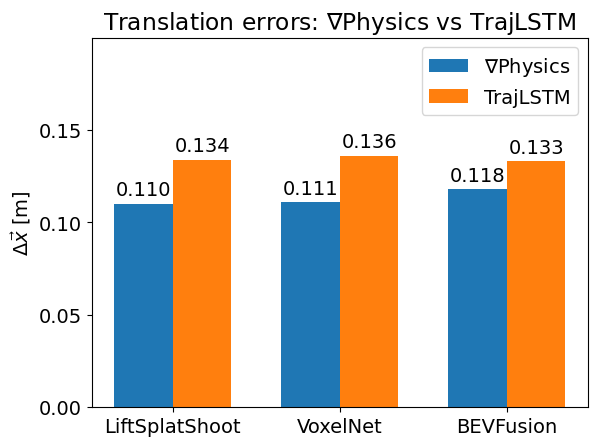

In [4]:
# create a bar plot
labels = ['LiftSplatShoot', 'VoxelNet', 'BEVFusion']
xyz_diff_dphys = [0.110, 0.111, 0.118]
xyz_diff_lstm = [0.134, 0.136, 0.133]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, xyz_diff_dphys, width, label=r'$\nabla$Physics')
rects2 = ax.bar(x + width / 2, xyz_diff_lstm, width, label='TrajLSTM')
ax.set_ylabel(r'$\Delta \vec{x}$ [m]')
ax.set_title(r'Translation errors: $\nabla$Physics vs TrajLSTM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0.0, 0.2, 0.05))
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
ax.set_ylim(0.0, 0.2)
plt.savefig('/home/ruslan/Desktop/xyz_diff.png')
plt.show()

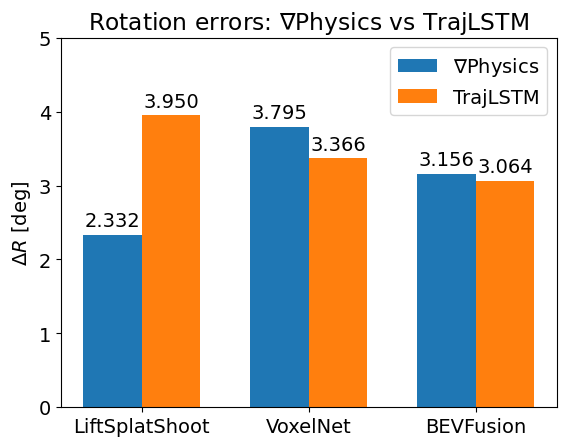

In [5]:
# create a bar plot
labels = ['LiftSplatShoot', 'VoxelNet', 'BEVFusion']
rot_diff_dphys = [2.332, 3.795, 3.156]
rot_diff_lstm = [3.950, 3.366, 3.064]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, rot_diff_dphys, width, label=r'$\nabla$Physics')
rects2 = ax.bar(x + width / 2, rot_diff_lstm, width, label='TrajLSTM')
ax.set_ylabel(r'$\Delta R$ [deg]')
ax.set_title(r'Rotation errors: $\nabla$Physics vs TrajLSTM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
ax.set_ylim(0.0, 5.0)
plt.savefig('/home/ruslan/Desktop/rot_diff.png')
plt.show()

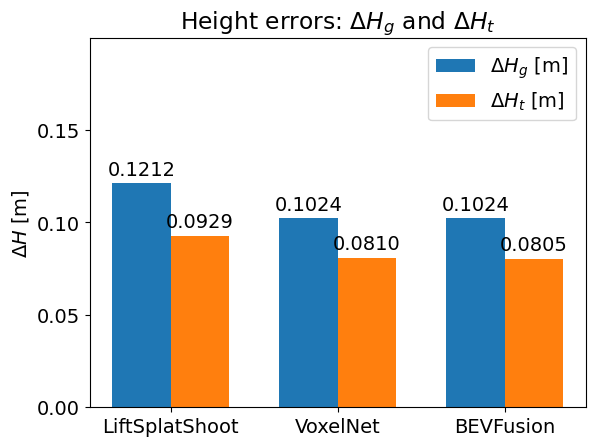

In [6]:
# create a bar plot
labels = ['LiftSplatShoot', 'VoxelNet', 'BEVFusion']
H_g_diff = [0.1212, 0.1024, 0.1024]
H_t_diff = [0.0929, 0.0810, 0.0805]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, H_g_diff, width, label=r'$\Delta H_g$ [m]')
rects2 = ax.bar(x + width / 2, H_t_diff, width, label=r'$\Delta H_t$ [m]')
ax.set_ylabel(r'$\Delta H$ [m]')
ax.set_title(r'Height errors: $\Delta H_g$ and $\Delta H_t$')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0.0, 0.2, 0.05))
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
ax.set_ylim(0.0, 0.2)
plt.savefig('/home/ruslan/Desktop/H_diff.png')
plt.show()